<a href="https://colab.research.google.com/github/Nato9-7/EDA_FundamentosML_RenatoDiaz/blob/main/InformeML_SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Pandas es una biblioteca de análisis y manipulación de datos.
import numpy as np # Numpy es una biblioteca para el cálculo numérico en Python.
import matplotlib.pyplot as plt # Matplotlib es una biblioteca para la creación de gráficos en Python.
from scipy.stats import norm # La distribución normal es una distribución de probabilidad continua que se utiliza ampliamente en estadística.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
cs_df = pd.read_csv(name, sep=",", encoding='UTF-8')

Saving DF_CS_ARREGLADO.csv to DF_CS_ARREGLADO.csv


count    666.000000
mean      79.792793
std       22.072178
min        6.000000
25%       66.000000
50%       78.000000
75%       94.000000
max      136.000000
Name: RoundKills, dtype: float64


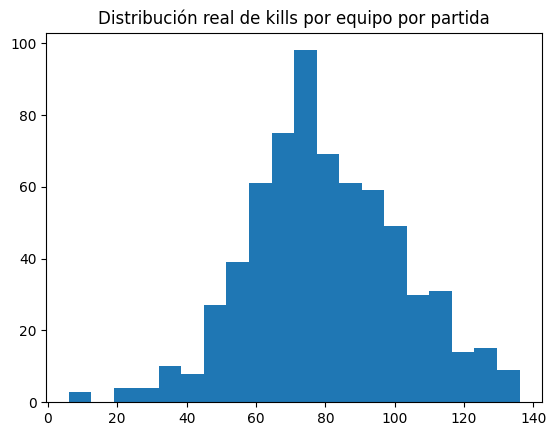

In [3]:
datos = cs_df.groupby(['MatchId', 'Team']).agg({
    'RoundKills': 'sum',
    'TeamStartingEquipmentValue': 'mean',
    'PrimarySniperRifle': 'mean',
    'RLethalGrenadesThrown': 'sum',
    'RNonLethalGrenadesThrown': 'sum',
    "PrimaryHeavy" : "mean",
    "PrimarySMG" : "mean",
    "PrimaryPistol" : "mean"
}).reset_index()
# Verificar distribución
print(datos['RoundKills'].describe())
plt.hist(datos['RoundKills'], bins=20)
plt.title('Distribución real de kills por equipo por partida')
plt.show()

#SUPPORT VECTOR MACHINE

In [4]:
X = datos.drop(['MatchId', 'Team', 'RoundKills'], axis=1)
y = datos['RoundKills']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Modelamiento

In [6]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_model = make_pipeline(
    StandardScaler(),  # Escalar datos es CRUCIAL para SVM
    SVR(kernel='rbf',  # Kernel radial
        C=10.0,         # Parámetro de regularización
        epsilon=0.1)   # Margen de error permitido
)

En el modelamiento esscalamos los datos. Utilizamos el kernel rbf, ya que es el más versatil. Por ultimo, utilizamos un parametro de penalizacion de errores de 10 y un epsilon de 0.1, el cual es el margen de error permitido

##Entrenamiento

In [7]:
svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=10.0))])

##Observación


COMPARACIÓN ENTRENAMIENTO vs PRUEBA
----------------------------------
Métrica		Entrenamiento	Prueba
R²		0.759		0.637
MAE		7.73		10.48
MSE		113.96		196.87


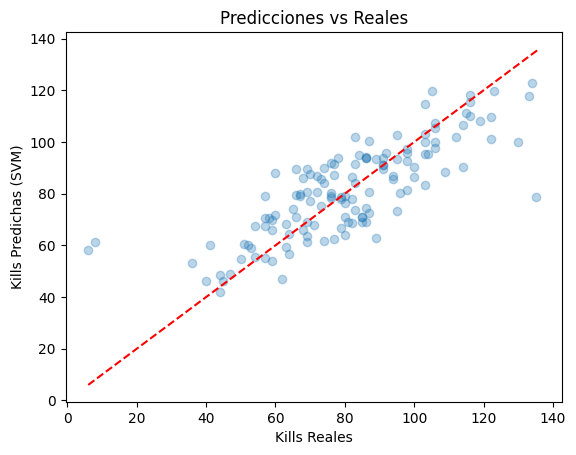

In [8]:
y_pred_svm = svm_model.predict(X_test)
# Predicciones en ambos conjuntos
y_train_pred = svm_model.predict(X_train)  # Datos de entrenamiento
y_test_pred = svm_model.predict(X_test)    # Datos de prueba

print("\nCOMPARACIÓN ENTRENAMIENTO vs PRUEBA")
print("----------------------------------")
print("Métrica\t\tEntrenamiento\tPrueba")
print(f"R²\t\t{r2_score(y_train, y_train_pred):.3f}\t\t{r2_score(y_test, y_test_pred):.3f}")
print(f"MAE\t\t{mean_absolute_error(y_train, y_train_pred):.2f}\t\t{mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"MSE\t\t{mean_squared_error(y_train, y_train_pred):.2f}\t\t{mean_squared_error(y_test, y_test_pred):.2f}")


plt.scatter(y_test, y_pred_svm, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Kills Reales')
plt.ylabel('Kills Predichas (SVM)')
plt.title('Predicciones vs Reales')
plt.show()

El sigueinte modelo solo nos dio un resultado de un 63% siendo el segundo peor comparado con los demás